In [18]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
plt.style.use('classic')


% matplotlib inline
%load_ext autoreload
% autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data= pd.read_csv('/data/Good data storage.csv')
data.head()

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
0,2016072704,27,3,0,0,0,1,"26,27,28,29","31,32,33,34,35",1,0,NaN,50Hz IE preonly
1,2017021501,30,3,0,0,0,2,"12,13","16,17",1,0,NaN,50Hz IE preonly
2,2016091403,30,2,0,0,0,1,"14,15","17,18",1,1,NaN,50Hz IE preonly
3,2017062202,24,1,0,0,0,1,"30,31,32","34,35",1,0,"No change, good data",50Hz IE preonly
4,2016072902,29,1,0,1,0,0,43,"45,46,47,48,49",1,0,NaN,50Hz IE preonly


In [3]:
data_am_nonasso = data[(data['Ptl_note']=='E_I_2Hz_POST_AM251')]

In [4]:
data_am_nonasso

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
147,2017112801,30,2,1,1,0,1,"5,6","8,9,10,11",20,5,Weak LTD,E_I_2Hz_POST_AM251
148,2017112901,30,2,1,1,0,1,43,"45,46,47,48,49",20,0,Weak LTD,E_I_2Hz_POST_AM251
149,2017120502,30,2,1,1,0,1,"12,13",15,20,20,No change,E_I_2Hz_POST_AM251
150,2017120701,24,2,1,1,0,1,"33,34","36,37,38,39",20,5,No change,E_I_2Hz_POST_AM251
151,2017120702,24,3,1,1,0,1,"21,22","24,25,26,27,28,29",20,5,No change,E_I_2Hz_POST_AM251
152,2017121101,27,2,1,1,0,1,"5,6,7,8,9","11,12,13,14",20,3,No change,E_I_2Hz_POST_AM251
153,2017121102,27,3,1,1,0,1,"24,25,26,27,28","30,31,32,33",20,0,No change,E_I_2Hz_POST_AM251


In [5]:
data_am_nonasso.drop(149, axis=0, inplace=True)

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [6]:
data_am_nonasso

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
147,2017112801,30,2,1,1,0,1,"5,6","8,9,10,11",20,5,Weak LTD,E_I_2Hz_POST_AM251
148,2017112901,30,2,1,1,0,1,43,"45,46,47,48,49",20,0,Weak LTD,E_I_2Hz_POST_AM251
150,2017120701,24,2,1,1,0,1,"33,34","36,37,38,39",20,5,No change,E_I_2Hz_POST_AM251
151,2017120702,24,3,1,1,0,1,"21,22","24,25,26,27,28,29",20,5,No change,E_I_2Hz_POST_AM251
152,2017121101,27,2,1,1,0,1,"5,6,7,8,9","11,12,13,14",20,3,No change,E_I_2Hz_POST_AM251
153,2017121102,27,3,1,1,0,1,"24,25,26,27,28","30,31,32,33",20,0,No change,E_I_2Hz_POST_AM251


/src/Patch_ana/Patch_ana/patch_pip.py:322: RuntimeWarning: Mean of empty slice
  tmp_trace = np.nanmean(data[i * ave_len:(i + 1) * ave_len + 2, :], axis=0)


<Container object of 3 artists>

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


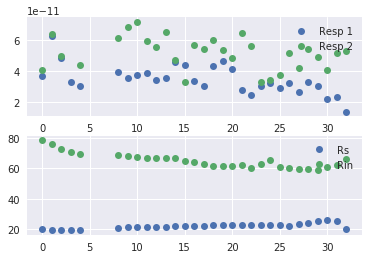

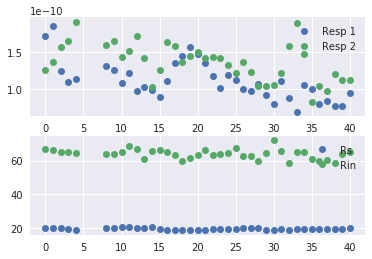

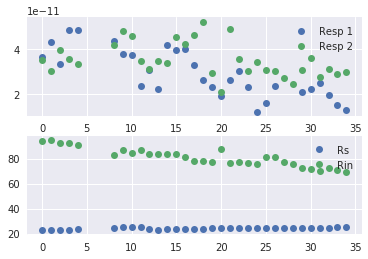

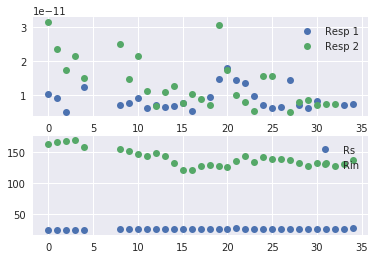

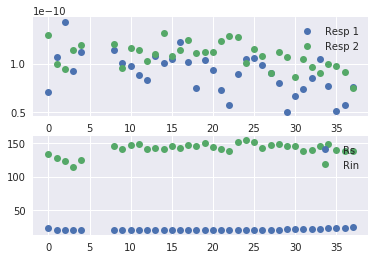

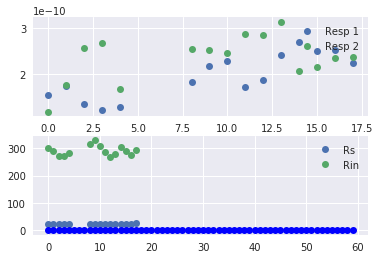

In [8]:
patch_pip.df_ana(data_am_nonasso,'/data/data_post_2Hz_reci', end_ana=[60,50,45,60, 40,40])
# patch_pip.df_ana(data_am_nonasso,'/data/data_am_nonasso')
data_am_nonasso = pd.read_pickle('/data/data_am_nonasso')
ave_ptl_mean, ave_ptl_ste = patch_pip.sample_plot(data_am_nonasso)
plt.errorbar(x=np.arange(len(ave_ptl_mean)), y=ave_ptl_mean, yerr=ave_ptl_ste, fmt='bo')

In [9]:
data_am_nonasso['Before'].index

Int64Index([147, 148, 150, 151, 152, 153], dtype='int64')

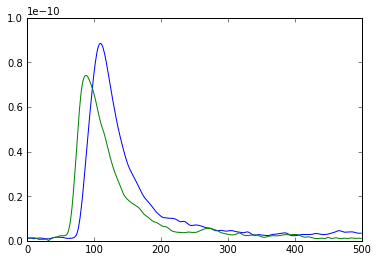

In [19]:
sample_id = 152
plt.plot(np.nanmean(np.vstack(data_am_nonasso['Before'].loc[sample_id]['trace_y1'])[:, :500], axis=0))
plt.plot(np.nanmean(np.vstack(data_am_nonasso['After'].loc[sample_id]['trace_y1'])[-5:,:500], axis=0))

plt.ylim([0, 1e-10])
with PdfPages('/data/Figure3_10.pdf') as pdf:
    pdf.savefig()

In [ ]:
elimi = np.array([20, 25, 15, 30, 33, 15])
elimi_sr = pd.Series(elimi, index=data_am_nonasso.index)
data_am_nonasso['elimi']=elimi_sr

In [ ]:
# data_am_nonasso.to_pickle('/data/ana_am_nonasso')